<h1>Pipeline</h1>

In [1]:
import numpy as np
import pandas as pd

from importlib import reload

%matplotlib inline
%load_ext autotime

time: 0 ns (started: 2021-09-20 15:41:46 +02:00)


In [2]:
from src.data import data as data
from src.preprocessing import preprocessing as preprocess
from src.models import model as model
from src.visualization import visualize as vis

time: 1.55 s (started: 2021-09-20 15:41:46 +02:00)


In [3]:
reload(data)

data_path = "../data/kddcup.data.gz"
df = data.load_data(data_path)

time: 11.7 s (started: 2021-09-20 15:41:48 +02:00)


In [4]:
df["label"].value_counts()

print(972000* 100 / 4898430)

19.843092582725486
time: 453 ms (started: 2021-09-20 15:41:59 +02:00)


In [5]:
reload(preprocess)

df = preprocess.features_encoder(df)
df = preprocess.normalize(df)
vis.dsp(df["label"].value_counts())

18    2807886
9     1072017
11     972781
17      15892
5       12481
       ...   
2           8
8           7
13          4
12          3
19          2
Name: label, Length: 23, dtype: int64

time: 13.4 s (started: 2021-09-20 15:42:00 +02:00)


In [6]:
train_df, val_df, test_df = preprocess.split_data(df)

time: 37.3 s (started: 2021-09-20 15:42:13 +02:00)


In [7]:
reload(model)
reload(vis)

parameters = {
    "n_estimators": [100, 150, 200], # Number of trees in the forest.
    "criterion": ["gini", "entropy"], # The function to measure the quality of a split.
    "max_depth": [None], # The maximum depth of the tree.
    "min_samples_split": [2], # The minimum number of samples required to split an internal node.
    "max_features": ["auto", None] # The number of features to consider when looking for the best split. 
}

# TODO
parameters = {
    "n_estimators": [100], # Number of trees in the forest.
    "criterion": ["gini"], # The function to measure the quality of a split.
    "max_depth": [None], # The maximum depth of the tree.
    "min_samples_split": [2], # The minimum number of samples required to split an internal node.
    "max_features": ["auto"] # The number of features to consider when looking for the best split. 
}

clf = model.train_model(train_df, val_df, parameters)

100%|██████████| 1/1 [01:46<00:00, 106.44s/it]


time: 3min 59s (started: 2021-09-20 15:42:51 +02:00)


In [8]:
reload(vis)

x_test, y_test = model.get_x_y_from_df(test_df)
pred = clf.predict(x_test)
acc, _, _ = vis.accuracy(y_test, pred, True)
print(acc)

Correct: 979638
Incorrect: 58
0.9999407979618167
time: 10.2 s (started: 2021-09-20 15:46:50 +02:00)


figure normalized saved under :  normalized_test.png
figure unnormalized saved under :  unnormalized_test.png


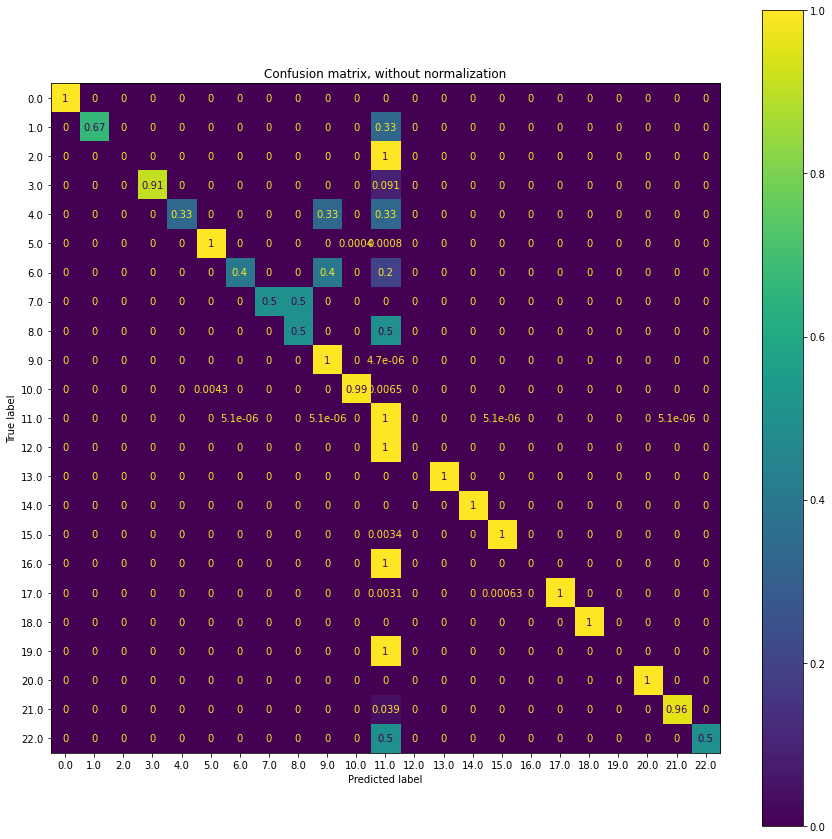

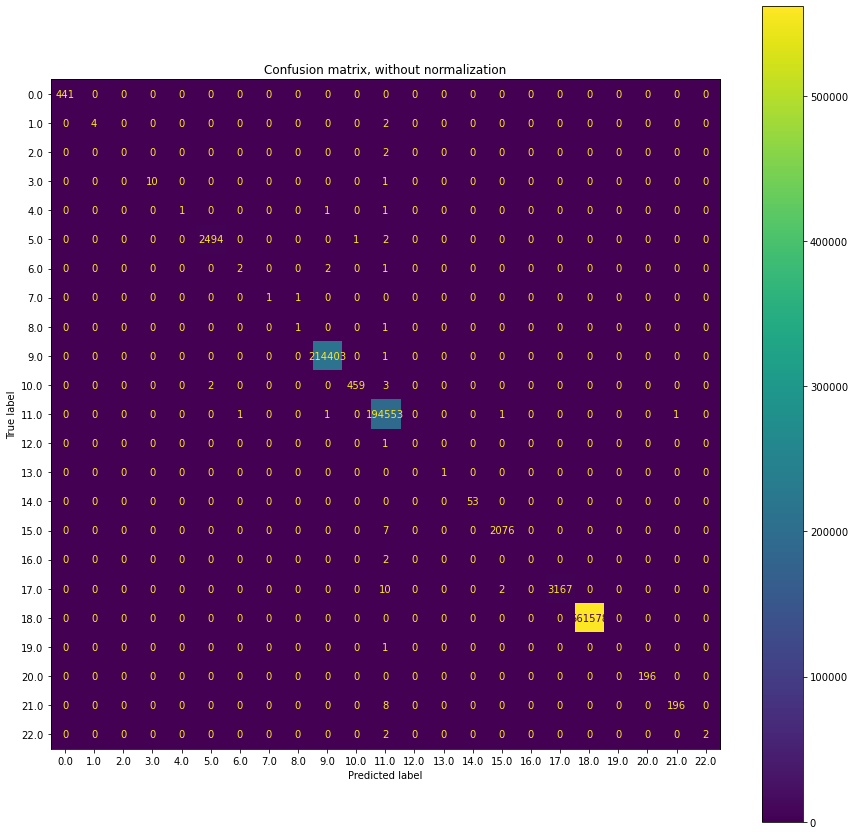

time: 34.2 s (started: 2021-09-20 16:38:05 +02:00)


In [26]:
reload(vis)

vis.get_confusion_matrix(clf,x_test,y_test,True,"test.png")